#### 1. 필요한 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#### 2. 데이터 로드 및 기본 탐색

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')


#### 3. 데이터 기본 정보 확인

In [ ]:
print("데이터셋 크기:", df.shape) # 행과 열의 수 출력
print("\n처음 5개 행:")
print(df.head())
print("\n기본 통계 정보:")
print(df.describe())


데이터셋 크기: (374, 13)

처음 5개 행:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1    

#### 4. groupby를 사용한 통계 분석

4.1 직업별 수면 시간과 수면 품질 평균

In [4]:
occupation_sleep = df.groupby('Occupation').agg({
    'Sleep Duration': ['mean', 'std', 'count'],
    'Quality of Sleep': ['mean', 'std']
}).round(2)
print("\n직업별 수면 통계:")
print(occupation_sleep)


직업별 수면 통계:
                     Sleep Duration             Quality of Sleep      
                               mean   std count             mean   std
Occupation                                                            
Accountant                     7.11  0.31    37             7.89  0.46
Doctor                         6.97  0.86    71             6.65  0.76
Engineer                       7.99  0.51    63             8.41  0.75
Lawyer                         7.41  0.27    47             7.89  0.31
Manager                        6.90   NaN     1             7.00   NaN
Nurse                          7.06  0.99    73             7.37  1.55
Sales Representative           5.90  0.00     2             4.00  0.00
Salesperson                    6.40  0.09    32             6.00  0.00
Scientist                      6.00  0.23     4             5.00  1.15
Software Engineer              6.75  0.87     4             6.50  1.91
Teacher                        6.69  0.23    40             6.98 

4.2 BMI 카테고리별 신체 활동량과 스트레스 레벨

In [5]:
bmi_stats = df.groupby('BMI Category').agg({
    'Physical Activity Level': ['mean', 'median', 'count'],
    'Stress Level': ['mean', 'median']
}).round(2)
print("\nBMI 카테고리별 통계:")
print(bmi_stats)



BMI 카테고리별 통계:
              Physical Activity Level              Stress Level       
                                 mean median count         mean median
BMI Category                                                          
Normal                          57.69   60.0   195         5.13    5.0
Normal Weight                   60.33   60.0    21         5.19    6.0
Obese                           55.00   60.0    10         5.70    5.0
Overweight                      61.24   45.0   148         5.73    7.0


4.3 수면 장애별 평균 수면 시간과 심박수

In [6]:
sleep_disorder_stats = df.groupby('Sleep Disorder').agg({
    'Sleep Duration': ['mean', 'std'],
    'Heart Rate': ['mean', 'std'],
    'Quality of Sleep': ['mean', 'std']
}).round(2)
print("\n수면 장애별 통계:")
print(sleep_disorder_stats)


수면 장애별 통계:
               Sleep Duration       Heart Rate       Quality of Sleep      
                         mean   std       mean   std             mean   std
Sleep Disorder                                                             
Insomnia                 6.59  0.39      70.47  4.95             6.53  0.80
Sleep Apnea              7.03  0.97      73.09  5.12             7.21  1.65


#### 5. 시각화

5.1 수면 장애별 평균 수면 시간 boxplot

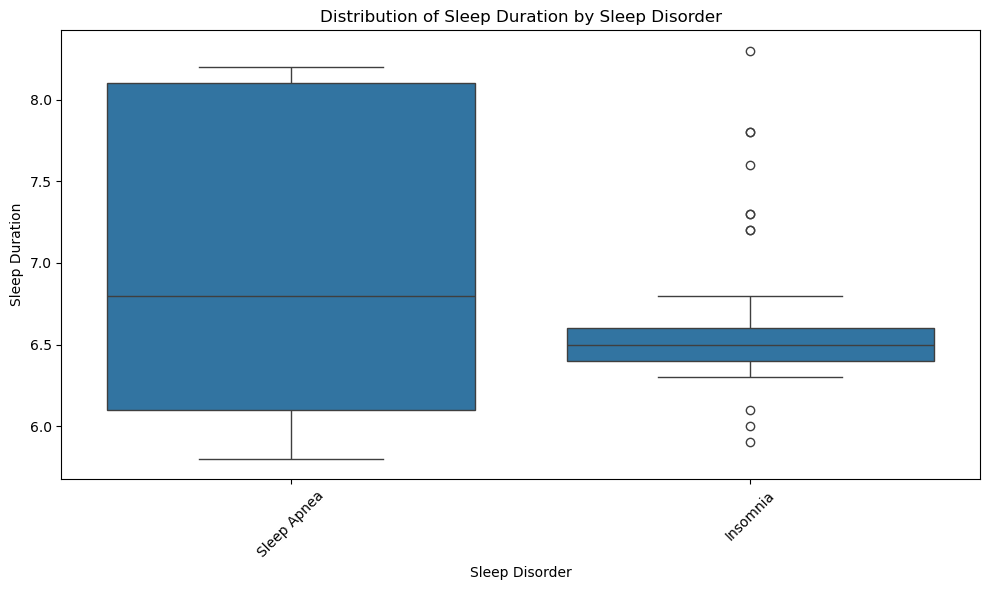

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df)
plt.title('Distribution of Sleep Duration by Sleep Disorder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5.2 직업별 스트레스 레벨과 수면 품질 관계

<Figure size 1200x600 with 0 Axes>

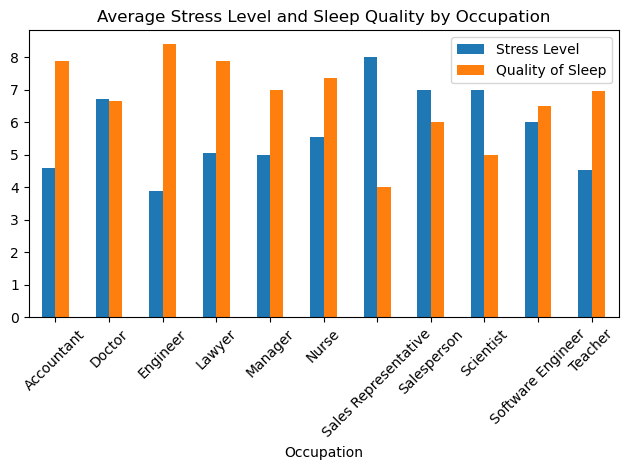

In [8]:
plt.figure(figsize=(12, 6))
occupation_stress_sleep = df.groupby('Occupation')[['Stress Level', 'Quality of Sleep']].mean()
occupation_stress_sleep.plot(kind='bar')
plt.title('Average Stress Level and Sleep Quality by Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 6. 머신러닝 모델 - 수면 장애 예측

6.1 특성 선택 및 전처리

In [ ]:
features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
           'Stress Level', 'Heart Rate', 'Daily Steps']
X = df[features]
y = df['Sleep Disorder'] # 예측할 타겟 변수

# 레이블 인코딩
le = LabelEncoder()
y = le.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6.2 모델 학습

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

6.3 모델 평가

In [18]:
# 원래의 수면 장애 클래스 이름을 직접 지정
target_names = ['Insomnia', 'None', 'Sleep Apnea']

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\n모델 정확도:", round(accuracy, 3))
print("\n분류 보고서:")
print(classification_report(y_test, y_pred, target_names=target_names))


모델 정확도: 0.88

분류 보고서:
              precision    recall  f1-score   support

    Insomnia       0.81      0.81      0.81        16
        None       0.85      0.69      0.76        16
 Sleep Apnea       0.91      0.98      0.94        43

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75



#### 7. 특성 중요도 시각화

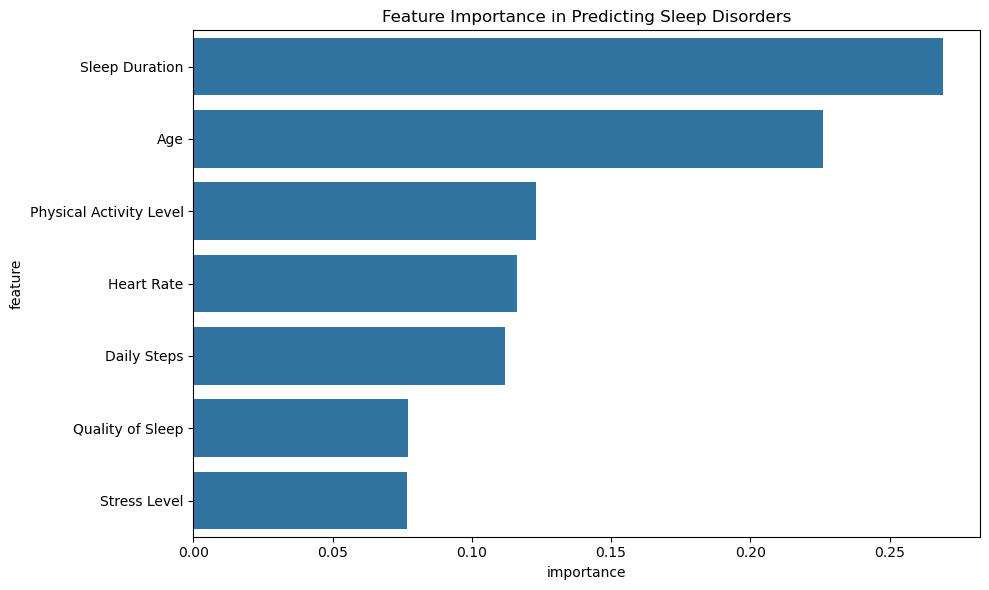

In [15]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Sleep Disorders')
plt.tight_layout()
plt.show()